In [2]:
import pickle
import pathlib

import sys
sys.path.append('../src/')

import matplotlib.pyplot as plt
import matplotlib

In [3]:
results = []
save_path = 'NCL_Regression_CaliforniaHousing_small_epoch_X.pkl'
result_path = pathlib.Path('results')

for epoch in range(6):
    
    this_save_path = list(save_path)
    this_save_path[-5] = str(epoch)
    this_save_path = ''.join(this_save_path)

    load_path = result_path / this_save_path
    
    with open(load_path, 'rb') as f:
        print(load_path)
        results.append(pickle.load(f))
    

results/NCL_Regression_CaliforniaHousing_small_epoch_0.pkl
results/NCL_Regression_CaliforniaHousing_small_epoch_1.pkl
results/NCL_Regression_CaliforniaHousing_small_epoch_2.pkl
results/NCL_Regression_CaliforniaHousing_small_epoch_3.pkl
results/NCL_Regression_CaliforniaHousing_small_epoch_4.pkl
results/NCL_Regression_CaliforniaHousing_small_epoch_5.pkl


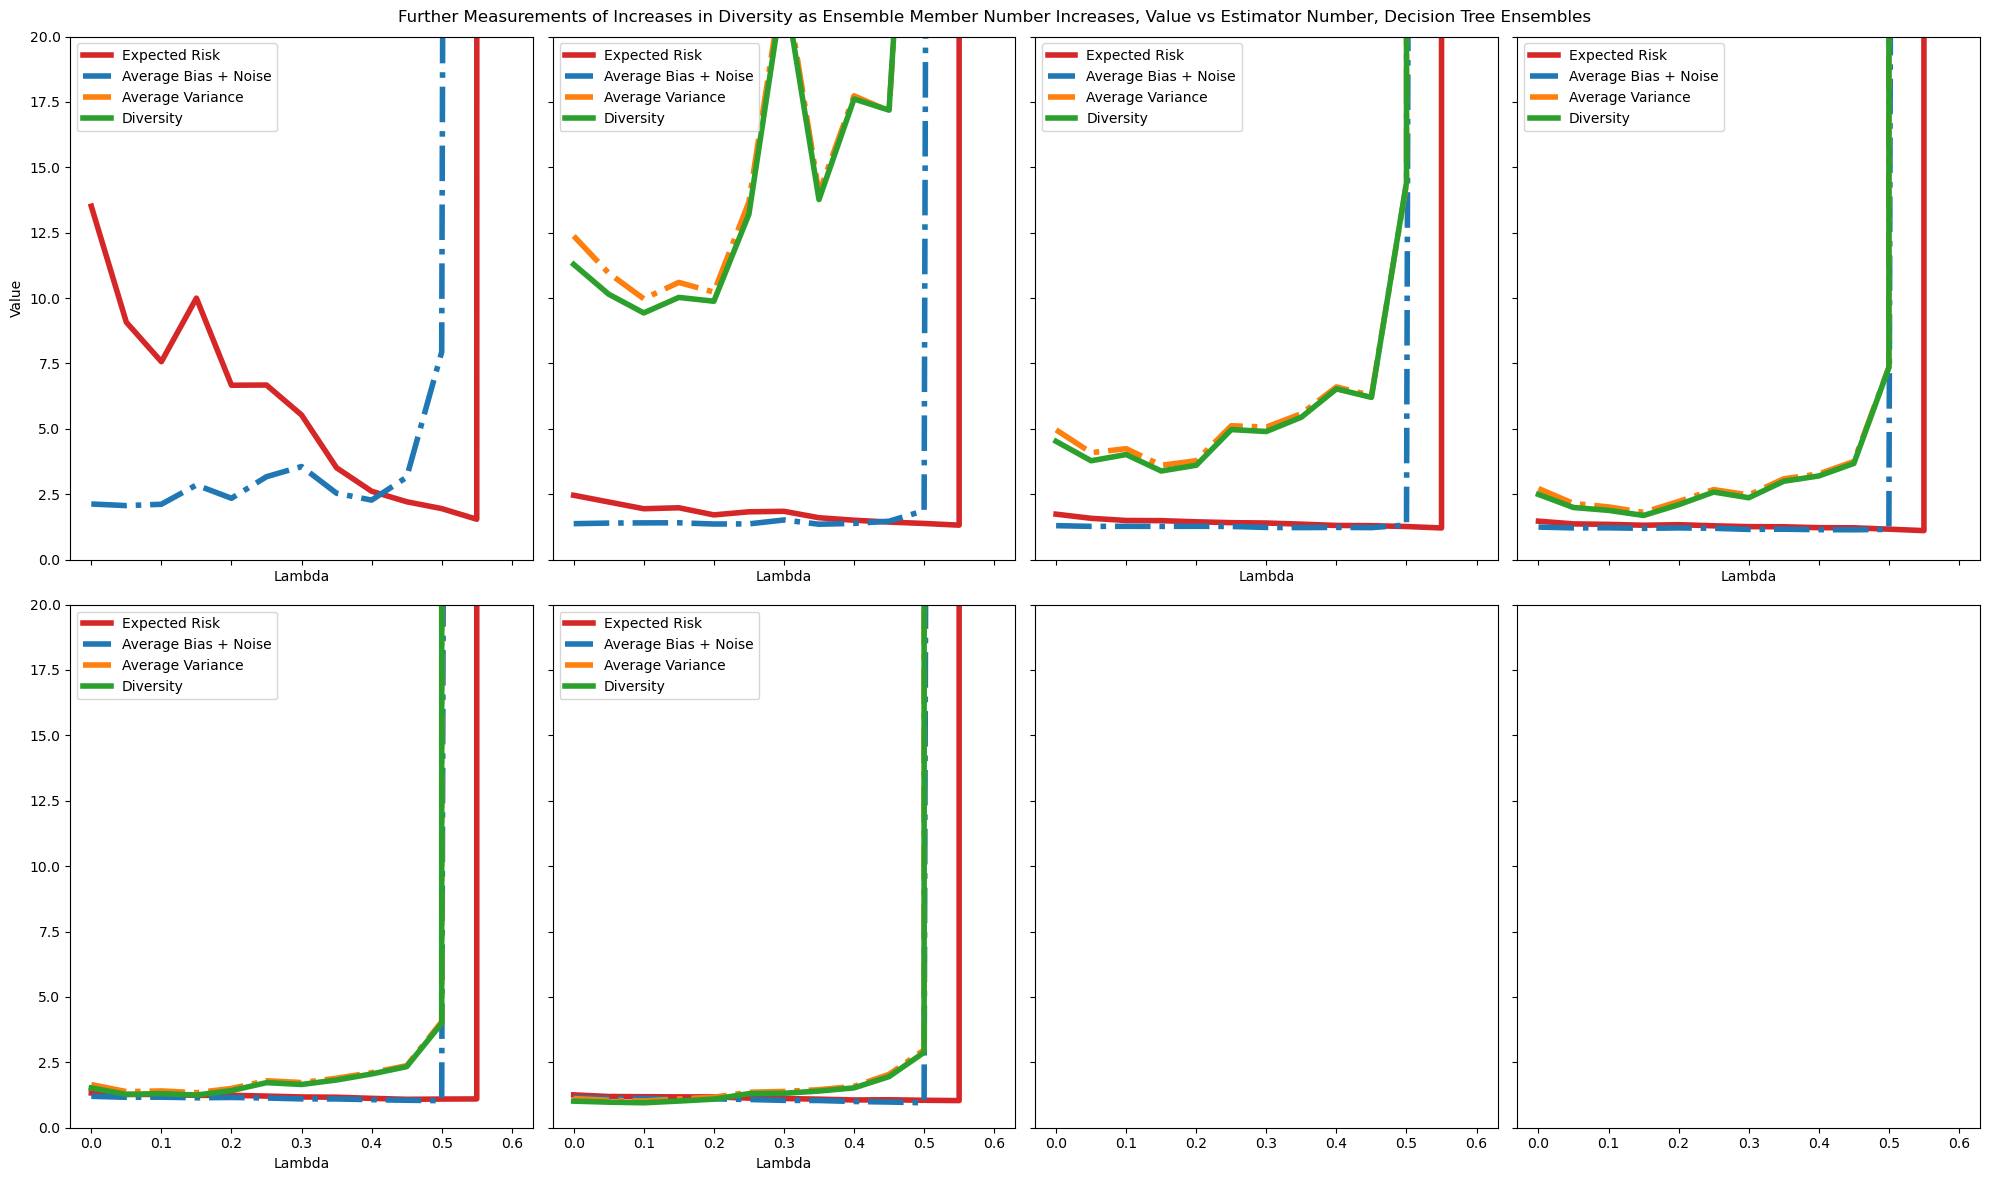

In [4]:
end = -1
xvals = results[0].parameter_values[0:end]

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(20,12))

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

linewidth = 4

for i, ax in enumerate(axs):

    if i >= len(results):
        break

    result = results[i]
    ax.plot(xvals, result.ensemble_risk[0:end], label="Expected Risk", color='tab:red', linewidth=linewidth)
    ax.plot(xvals, result.average_bias[0:end], label="Average Bias + Noise", linestyle="dashdot", color='tab:blue', linewidth=linewidth)
    ax.plot(xvals, result.average_variance[0:end], label="Average Variance", linestyle="dashdot", color='tab:orange', linewidth=linewidth)
    ax.plot(xvals, result.diversity[0:end], label="Diversity", color='tab:green', linewidth=linewidth)

    ax.set_xlabel("Lambda")

    ax.legend()

fig.suptitle("Further Measurements of Increases in Diversity as Ensemble Member Number Increases, Value vs Estimator Number, Decision Tree Ensembles")

# even_vals = [1] + [x for x in xvals if x % 2 == 0]
# ax1.set_xticks(even_vals)
ax1.set_ylim(0,20)
ax1.set_ylabel("Value")

# plt.legend()
plt.tight_layout()
plt.show()


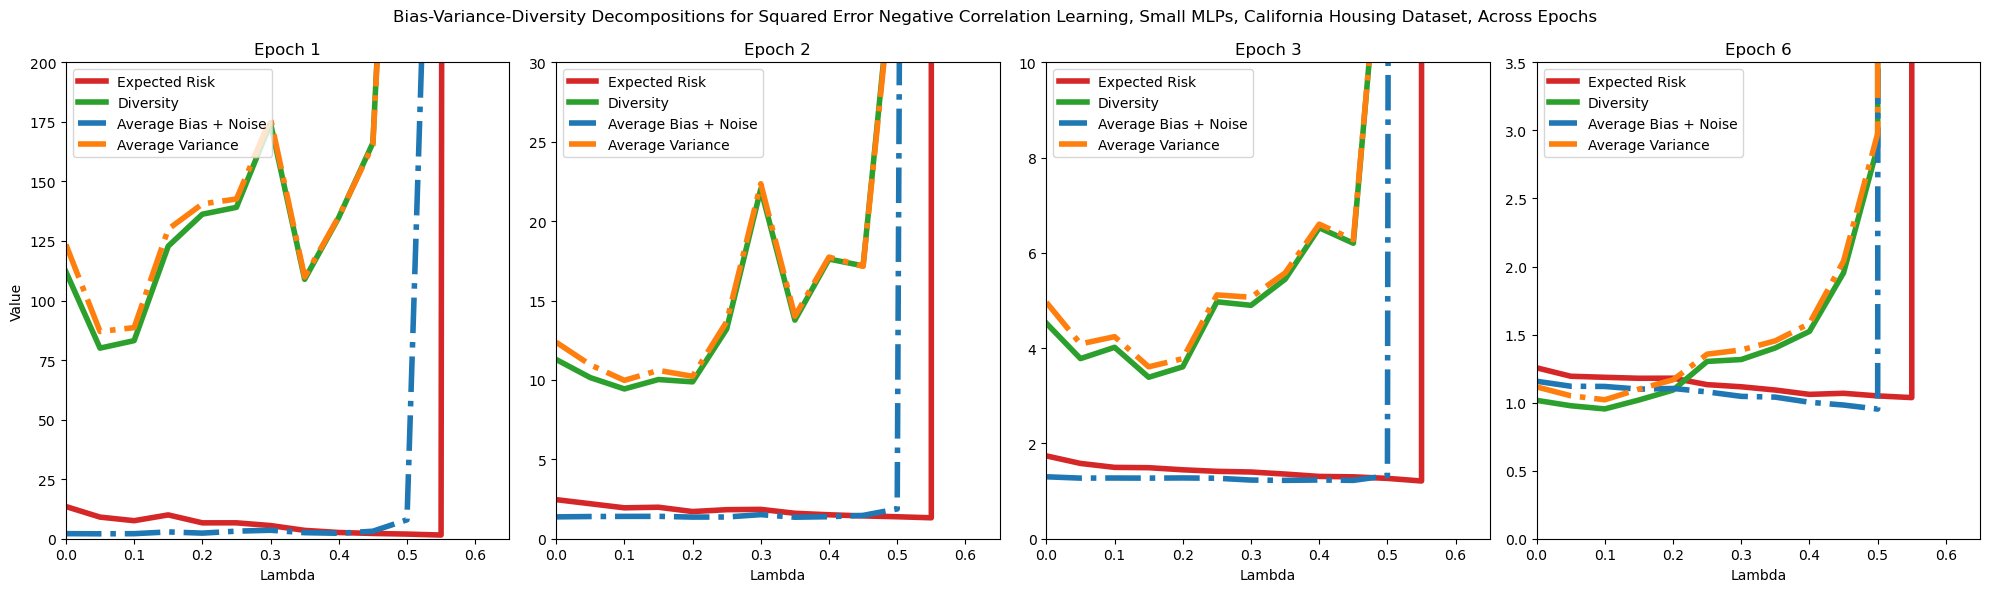

In [5]:
xvals = results[0].parameter_values

# 2 hidden layers size 8

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, figsize=(20,6))

axs = [ax1, ax2, ax3, ax4]
epochs = [0,1,2,5]
titles = ["Epoch 1", "Epoch 2", "Epoch 3", "Epoch 6",]

linewidth = 4

for i, ax in enumerate(axs):

    result = results[epochs[i]]
    ax.plot(xvals, result.ensemble_risk, label="Expected Risk", color='tab:red', linewidth=linewidth)
    ax.plot(xvals, result.diversity, label="Diversity", color='tab:green', linewidth=linewidth)
    ax.plot(xvals, result.average_bias, label="Average Bias + Noise", linestyle="dashdot", color='tab:blue', linewidth=linewidth)
    ax.plot(xvals, result.average_variance, label="Average Variance", linestyle="dashdot", color='tab:orange', linewidth=linewidth)
    ax.set_title(titles[i])
    

    ax.set_xlabel("Lambda")

    ax.legend()

fig.suptitle("Bias-Variance-Diversity Decompositions for Squared Error Negative Correlation Learning, Small MLPs, California Housing Dataset, Across Epochs")

even_vals = [1] + [x for x in xvals if x % 2 == 0]
# ax1.set_xticks(even_vals)
ax1.set_xlim(0,xvals[-1])
ax1.set_ylim(0,200)
ax1.set_ylabel("Value")

ax2.set_ylim(0,30)

ax3.set_ylim(0,10)

ax4.set_ylim(0,3.5)

# plt.legend()
plt.tight_layout()
plt.show()


In [6]:
large_results = []
save_path = 'NCL_Regression_CaliforniaHousing_epoch_X.pkl'
result_path = pathlib.Path('results')

for epoch in range(5):
    
    this_save_path = list(save_path)
    this_save_path[-5] = str(epoch)
    this_save_path = ''.join(this_save_path)

    load_path = result_path / this_save_path
    
    with open(load_path, 'rb') as f:
        print(load_path)
        large_results.append(pickle.load(f))

results/NCL_Regression_CaliforniaHousing_epoch_0.pkl
results/NCL_Regression_CaliforniaHousing_epoch_1.pkl
results/NCL_Regression_CaliforniaHousing_epoch_2.pkl
results/NCL_Regression_CaliforniaHousing_epoch_3.pkl
results/NCL_Regression_CaliforniaHousing_epoch_4.pkl


In [7]:
risk_results_matrix = []

for i, result in enumerate(results):

    # desired_vals = (result.ensemble_risk, result.diversity, result.average_bias, result.average_variance)
    risk_results_matrix.append(result.ensemble_risk)

risk_results_matrix = np.array(risk_results_matrix).squeeze().T

NameError: name 'np' is not defined

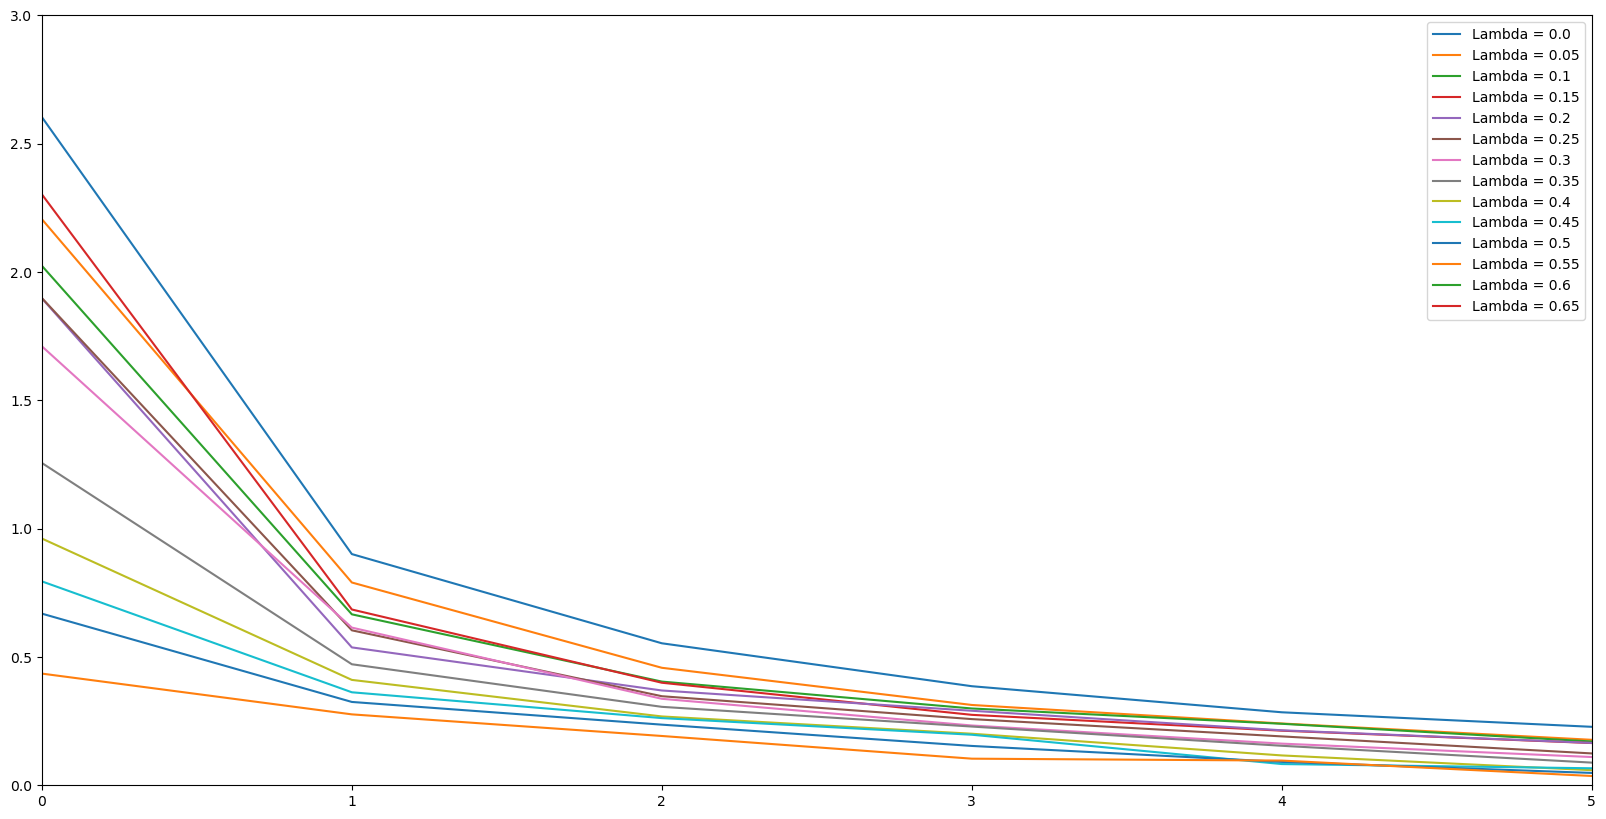

In [ ]:
fig= plt.figure(figsize=(20,10))
epochs = np.arange(risk_results_matrix.shape[1])

lambda_vals = results[0].parameter_values

for i, res in enumerate(risk_results_matrix):
    label_str = "Lambda = " + str(lambda_vals[i])
    plt.plot(epochs, np.log(res), label=label_str)

plt.xlim(0,epochs[-1])
plt.ylim(0,3)

# plt.title(f'Ensemble and member loss per epoch for lambda {lambda_val}, averaged across trials')


# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
plt.legend()

plt.show()

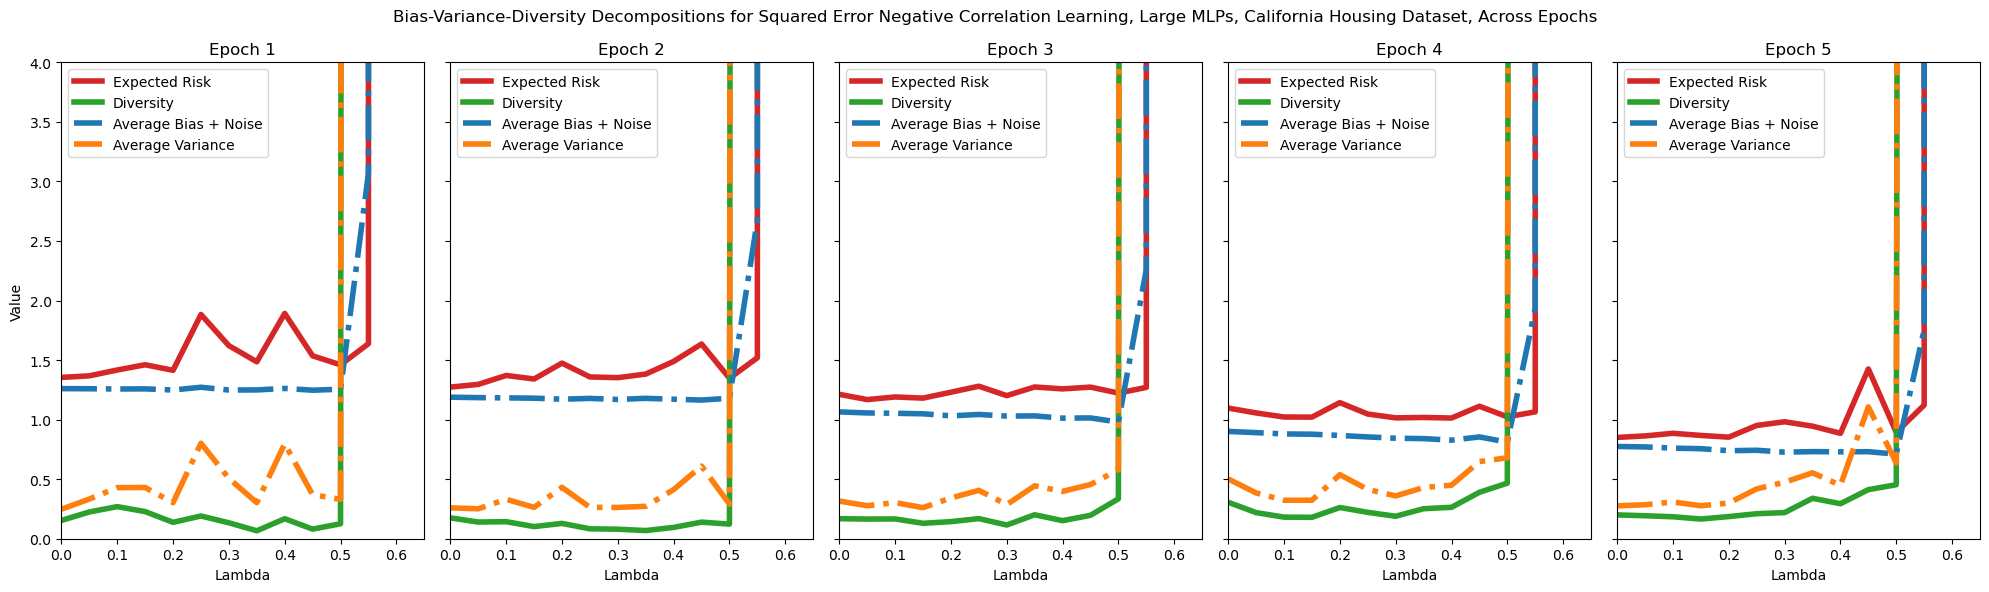

In [ ]:
xvals = large_results[0].parameter_values

# 4 hidden layers size 64

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(20,6))

axs = [ax1, ax2, ax3, ax4, ax5]
epochs = [0,1,2,3,4]
titles = ["Epoch 1", "Epoch 2", "Epoch 3", "Epoch 4", "Epoch 5"]

linewidth = 4

for i, ax in enumerate(axs):

    result = large_results[epochs[i]]
    ax.plot(xvals, result.ensemble_risk, label="Expected Risk", color='tab:red', linewidth=linewidth)
    ax.plot(xvals, result.diversity, label="Diversity", color='tab:green', linewidth=linewidth)
    ax.plot(xvals, result.average_bias, label="Average Bias + Noise", linestyle="dashdot", color='tab:blue', linewidth=linewidth)
    ax.plot(xvals, result.average_variance, label="Average Variance", linestyle="dashdot", color='tab:orange', linewidth=linewidth)
    ax.set_title(titles[i])
    

    ax.set_xlabel("Lambda")

    ax.legend()

fig.suptitle("Bias-Variance-Diversity Decompositions for Squared Error Negative Correlation Learning, Large MLPs, California Housing Dataset, Across Epochs")

even_vals = [1] + [x for x in xvals if x % 2 == 0]
# ax1.set_xticks(even_vals)
ax1.set_xlim(0,xvals[-1])
ax1.set_ylim(0,4)
ax1.set_ylabel("Value")

# plt.legend()
plt.tight_layout()
plt.show()

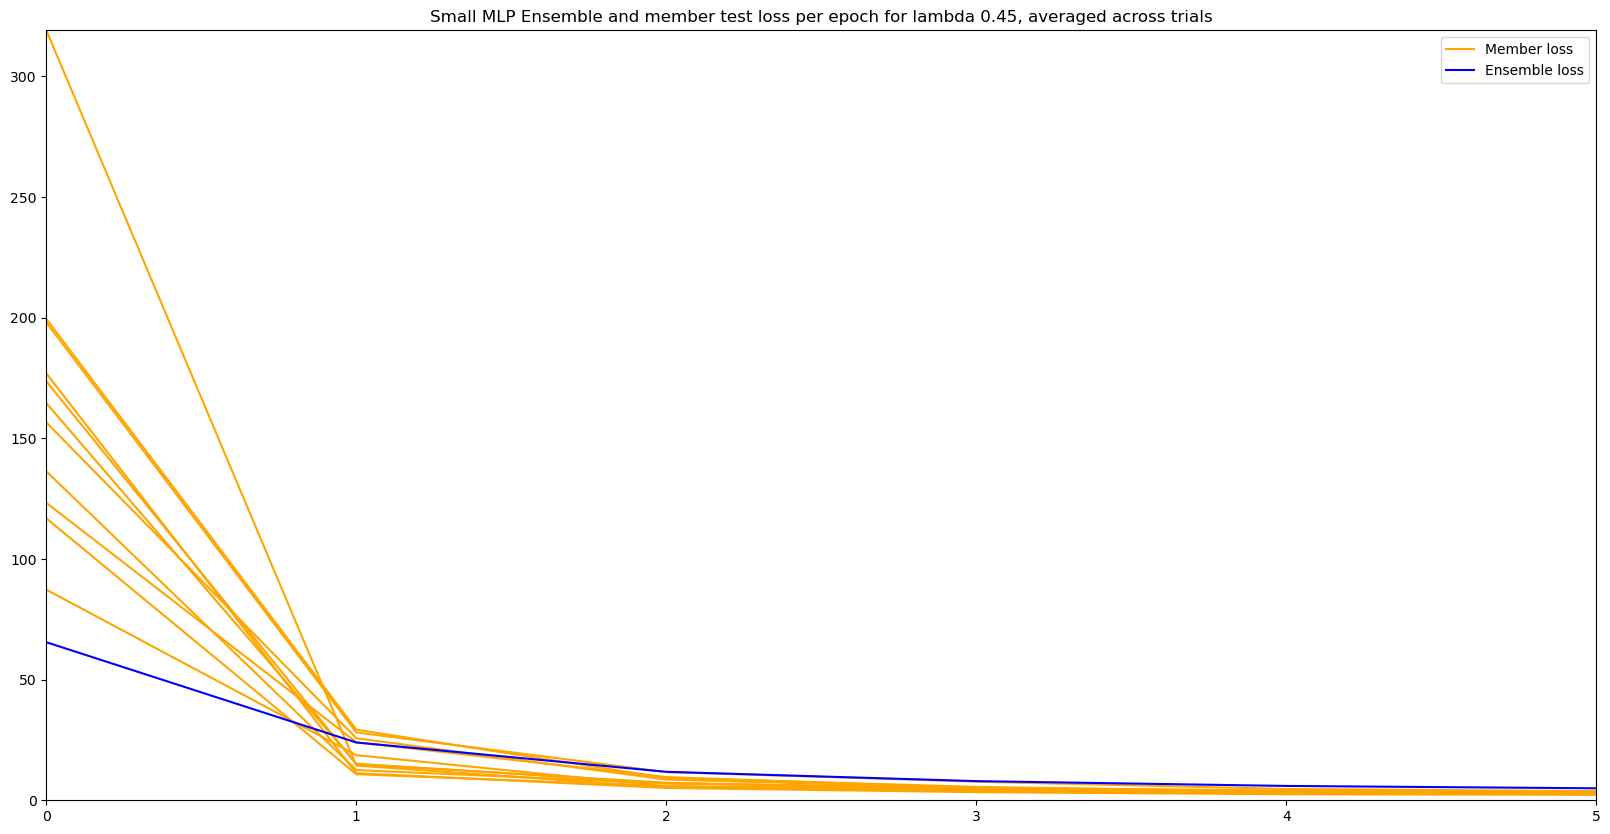

In [ ]:
mem_test_errs = []
ens_test_errs = []
for result in results:
    mem_test_errs.append(result.member_test_error)
    ens_test_errs.append(result.test_error)

import numpy as np
full_ens_test_errs = np.moveaxis(np.array(ens_test_errs).squeeze(), 0, -1)
full_mem_test_errs = np.moveaxis(np.array(mem_test_errs).squeeze(), 0, -1)


selected_lambda_idx = -5
selected_lambda_ens_error = full_ens_test_errs[selected_lambda_idx]
selected_mem_err = full_mem_test_errs[selected_lambda_idx]
lambda_val = results[0].parameter_values[selected_lambda_idx]

fig= plt.figure(figsize=(20,10))
epochs = np.arange(selected_lambda_ens_error.shape[0])


for mem in selected_mem_err:
    plt.plot(epochs, mem, color='Orange', label="Member loss")

plt.plot(epochs, selected_lambda_ens_error, color='b', label="Ensemble loss")

plt.xlim(0,epochs[-1])
plt.ylim(0,np.max(selected_mem_err))

plt.title(f'Small MLP Ensemble and member test loss per epoch for lambda {lambda_val}, averaged across trials')


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()


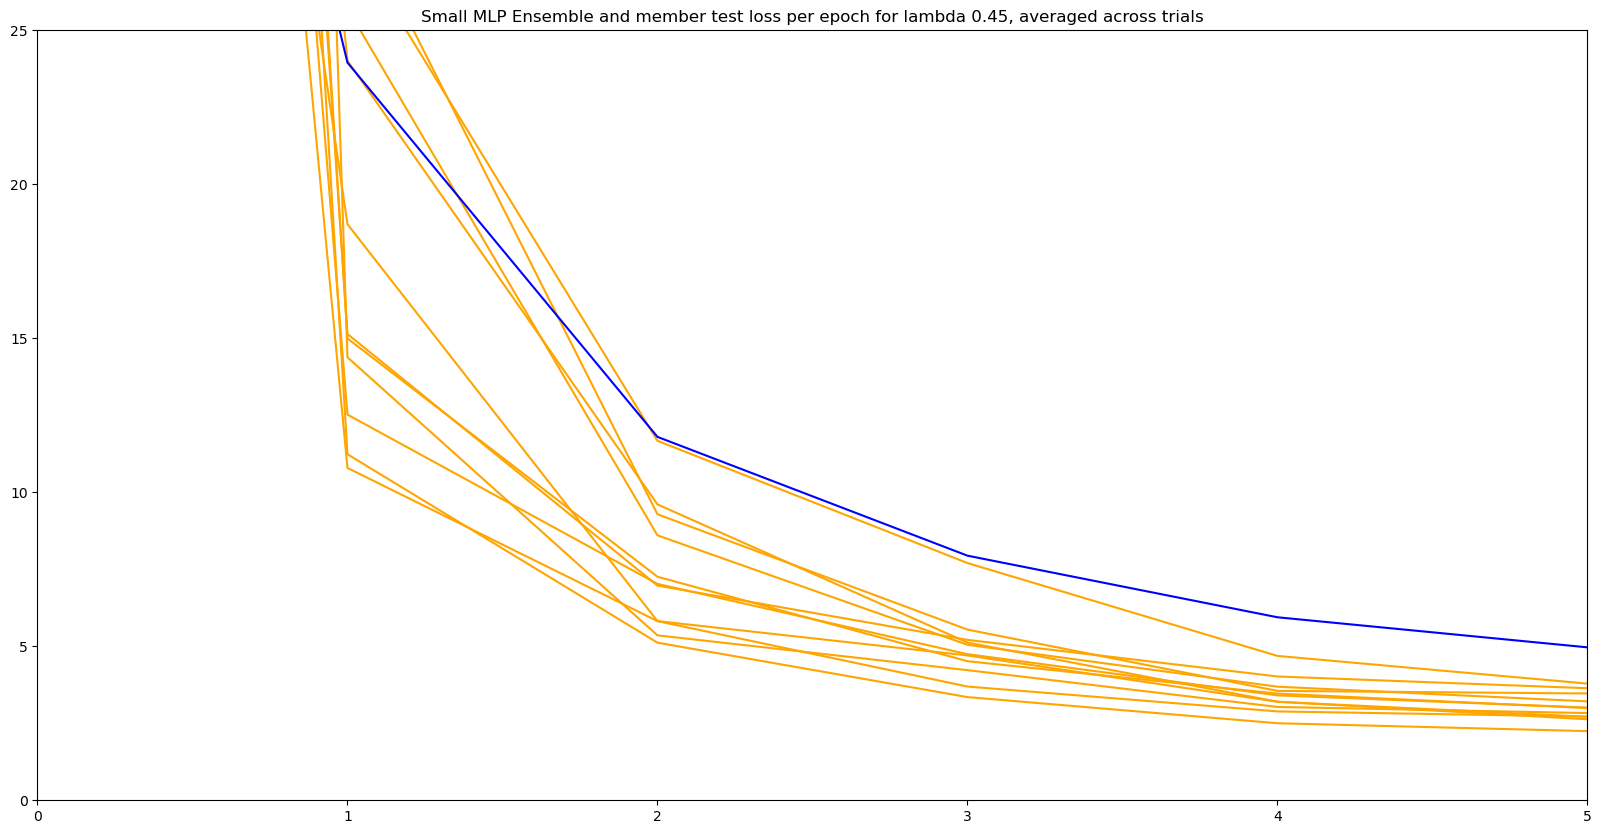

In [8]:
mem_test_errs = []
ens_test_errs = []
for result in results:
    mem_test_errs.append(result.member_test_error)
    ens_test_errs.append(result.test_error)

import numpy as np
full_ens_test_errs = np.moveaxis(np.array(ens_test_errs).squeeze(), 0, -1)
full_mem_test_errs = np.moveaxis(np.array(mem_test_errs).squeeze(), 0, -1)
# print(full_mem_test_errs.shape)


selected_lambda_idx = -5
selected_lambda_ens_error = full_ens_test_errs[selected_lambda_idx]
selected_mem_err = full_mem_test_errs[selected_lambda_idx]
lambda_val = results[0].parameter_values[selected_lambda_idx]

fig= plt.figure(figsize=(20,10))
epochs = np.arange(selected_lambda_ens_error.shape[0])


for mem in selected_mem_err:
    plt.plot(epochs, mem, color='Orange', label="Member loss")

plt.plot(epochs, selected_lambda_ens_error, color='b', label="Ensemble loss")

plt.xlim(0,epochs[-1])
plt.ylim(0,np.max(selected_mem_err))

plt.title(f'Small MLP Ensemble and member test loss per epoch for lambda {lambda_val}, averaged across trials')


# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())

plt.ylim(0,25)

plt.show()

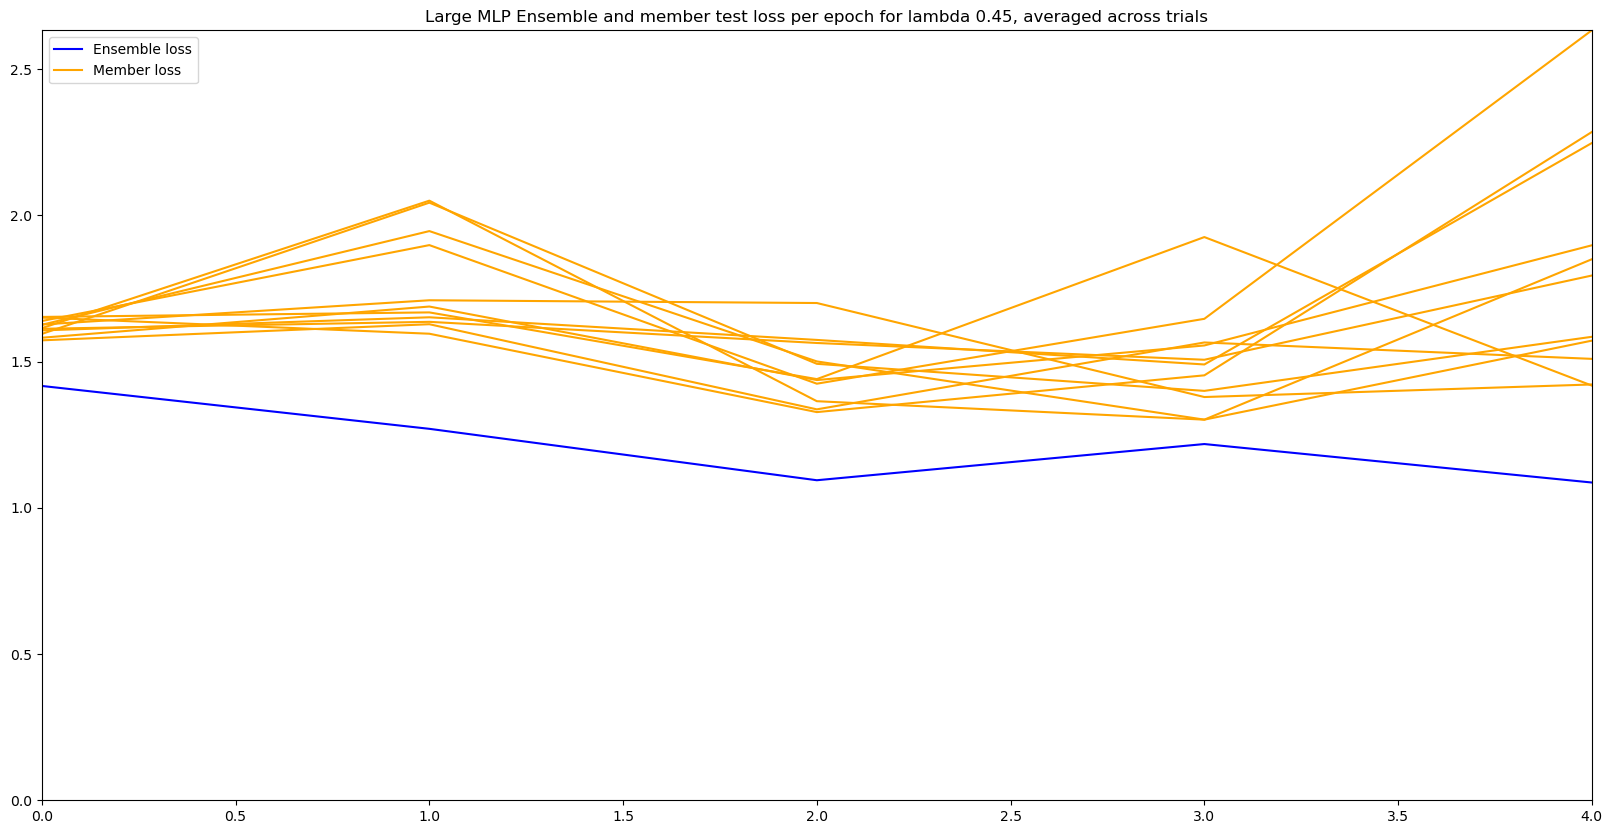

In [ ]:
mem_test_errs = []
ens_test_errs = []
for result in large_results:
    mem_test_errs.append(result.member_test_error)
    ens_test_errs.append(result.test_error)
import numpy as np
full_ens_test_errs = np.moveaxis(np.array(ens_test_errs).squeeze(), 0, -1)
full_mem_test_errs = np.moveaxis(np.array(mem_test_errs).squeeze(), 0, -1)
# print(full_mem_test_errs.shape)


selected_lambda_idx = -5
selected_lambda_ens_error = full_ens_test_errs[selected_lambda_idx]
selected_mem_err = full_mem_test_errs[selected_lambda_idx]
lambda_val = large_results[0].parameter_values[selected_lambda_idx]

fig= plt.figure(figsize=(20,10))
epochs = np.arange(selected_lambda_ens_error.shape[0])
plt.plot(epochs, selected_lambda_ens_error, color='b', label="Ensemble loss")

for mem in selected_mem_err:
    plt.plot(epochs, mem, color='Orange', label="Member loss")

plt.xlim(0,epochs[-1])
plt.ylim(0,np.max(selected_mem_err))

plt.title(f'Large MLP Ensemble and member test loss per epoch for lambda {lambda_val}, averaged across trials')


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

